In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
!pip install PC



  Preparing metadata (setup.py) ... done
  Created wheel for PC: filename=pc-0.0.3-py3-none-any.whl size=6161 sha256=42ddae48fc6173e7f27ffbe9626e0ee2fd532404a21ff6f62d778e88bba686a6
  Stored in directory: /root/.cache/pip/wheels/c5/e3/bd/1cf0310463f894d05acd910db5f241c34aa580aa32f3e5fdac
Successfully built PC


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.decomposition import PCA


In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
df = pd.read_csv(url)
df.head()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [ ]:
column_names = [
    "class", "cap-shape", "cap-surface", "cap-color", "bruises", "odor",
    "gill-attachment", "gill-spacing", "gill-size", "gill-color",
    "stalk-shape", "stalk-root", "stalk-surface-above-ring", "stalk-surface-below-ring",
    "stalk-color-above-ring", "stalk-color-below-ring", "veil-type", "veil-color",
    "ring-number", "ring-type", "spore-print-color", "population", "habitat"
]

df = pd.read_csv(url, names=column_names)

df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
attribute_mappings = {
    'class': {
        'e': 'edible',
        'p': 'poisonous'
    },
    'cap-shape': {
        'b': 'bell',
        'c': 'conical',
        'x': 'convex',
        'f': 'flat',
        'k': 'knobbed',
        's': 'sunken'
    },
    'cap-surface': {
        'f': 'fibrous',
        'g': 'grooves',
        'y': 'scaly',
        's': 'smooth'
    },
    'cap-color': {
        'n': 'brown',
        'b': 'buff',
        'c': 'cinnamon',
        'g': 'gray',
        'r': 'green',
        'p': 'pink',
        'u': 'purple',
        'e': 'red',
        'w': 'white',
        'y': 'yellow'
    },
    'bruises': {
        't': 'bruises',
        'f': 'no'
    },
    'odor': {
        'a': 'almond',
        'l': 'anise',
        'c': 'creosote',
        'y': 'fishy',
        'f': 'foul',
        'm': 'musty',
        'n': 'none',
        'p': 'pungent',
        's': 'spicy'
    },
    'gill-attachment': {
        'a': 'attached',
        'd': 'descending',
        'f': 'free',
        'n': 'notched'
    },
    'gill-spacing': {
        'c': 'close',
        'w': 'crowded',
        'd': 'distant'
    },
    'gill-size': {
        'b': 'broad',
        'n': 'narrow'
    },
    'gill-color': {
        'k': 'black',
        'n': 'brown',
        'b': 'buff',
        'h': 'chocolate',
        'g': 'gray',
        'r': 'green',
        'o': 'orange',
        'p': 'pink',
        'u': 'purple',
        'e': 'red',
        'w': 'white',
        'y': 'yellow'
    },
    'stalk-shape': {
        'e': 'enlarging',
        't': 'tapering'
    },
    'stalk-root': {
        'b': 'bulbous',
        'c': 'club',
        'u': 'cup',
        'e': 'equal',
        'z': 'rhizomorphs',
        'r': 'rooted',
        '?': 'missing'
    },
    'stalk-surface-above-ring': {
        'f': 'fibrous',
        'y': 'scaly',
        'k': 'silky',
        's': 'smooth'
    },
    'stalk-surface-below-ring': {
        'f': 'fibrous',
        'y': 'scaly',
        'k': 'silky',
        's': 'smooth'
    },
    'stalk-color-above-ring': {
        'n': 'brown',
        'b': 'buff',
        'c': 'cinnamon',
        'g': 'gray',
        'o': 'orange',
        'p': 'pink',
        'e': 'red',
        'w': 'white',
        'y': 'yellow'
    },
    'stalk-color-below-ring': {
        'n': 'brown',
        'b': 'buff',
        'c': 'cinnamon',
        'g': 'gray',
        'o': 'orange',
        'p': 'pink',
        'e': 'red',
        'w': 'white',
        'y': 'yellow'
    },
    'veil-type': {
        'p': 'partial',
        'u': 'universal'
    },
    'veil-color': {
        'n': 'brown',
        'o': 'orange',
        'w': 'white',
        'y': 'yellow'
    },
    'ring-number': {
        'n': 'none',
        'o': 'one',
        't': 'two'
    },
    'ring-type': {
        'c': 'cobwebby',
        'e': 'evanescent',
        'f': 'flaring',
        'l': 'large',
        'n': 'none',
        'p': 'pendant',
        's': 'sheathing',
        'z': 'zone'
    },
    'spore-print-color': {
        'k': 'black',
        'n': 'brown',
        'b': 'buff',
        'h': 'chocolate',
        'r': 'green',
        'o': 'orange',
        'u': 'purple',
        'w': 'white',
        'y': 'yellow'
    },
    'population': {
        'a': 'abundant',
        'c': 'clustered',
        'n': 'numerous',
        's': 'scattered',
        'v': 'several',
        'y': 'solitary'
    },
    'habitat': {
        'g': 'grasses',
        'l': 'leaves',
        'm': 'meadows',
        'p': 'paths',
        'u': 'urban',
        'w': 'waste',
        'd': 'woods'
    }
}

In [ ]:
def decode_feature(value, feature_name):
    """Decode a feature using the mapping dictionary"""
    return attribute_mappings[feature_name].get(value, value)

# Transfor all dataframe
def decode_dataframe(df):
    df_decoded = df.copy()

    for column in df.columns:
        if column in attribute_mappings:
            df_decoded[column] = df_decoded[column].apply(lambda x: decode_feature(x, column))
    return df_decoded

df_decoded = decode_dataframe(df)
print(df_decoded.head(5))

df_decoded.to_csv('agaricus-lepiota-decoded.csv', index=False)
print("Decoded data saved to 'agaricus-lepiota-decoded.csv'")

       class cap-shape cap-surface cap-color  bruises     odor  \
0  poisonous    convex      smooth     brown  bruises  pungent   
1     edible    convex      smooth    yellow  bruises   almond   
2     edible      bell      smooth     white  bruises    anise   
3  poisonous    convex       scaly     white  bruises  pungent   
4     edible    convex      smooth      gray       no     none   

  gill-attachment gill-spacing gill-size gill-color  ...  \
0            free        close    narrow      black  ...   
1            free        close     broad      black  ...   
2            free        close     broad      brown  ...   
3            free        close    narrow      brown  ...   
4            free      crowded     broad      black  ...   

  stalk-surface-below-ring stalk-color-above-ring stalk-color-below-ring  \
0                   smooth                  white                  white   
1                   smooth                  white                  white   
2             

In [ ]:
df_decoded

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,edible,knobbed,smooth,brown,no,none,attached,close,broad,yellow,...,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves
8120,edible,convex,smooth,brown,no,none,attached,close,broad,yellow,...,smooth,orange,orange,partial,brown,one,pendant,buff,several,leaves
8121,edible,flat,smooth,brown,no,none,attached,close,broad,brown,...,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves
8122,poisonous,knobbed,scaly,brown,no,fishy,free,close,narrow,buff,...,silky,white,white,partial,white,one,evanescent,white,several,leaves


| Variable                     | Descripción                                                                                                 |
| ---------------------------- | ----------------------------------------------------------------------------------------------------------- |
| **class**                    | Tipo de seta: `'e'` (edible = comestible), `'p'` (poisonous = venenosa). **Variable objetivo**.             |
| **cap-shape**                | Forma del sombrero de la seta: bell, conical, convex, flat, knobbed, sunken.                                |
| **cap-surface**              | Textura de la superficie del sombrero: fibrosa, ranurada, escamosa, lisa.                                   |
| **cap-color**                | Color del sombrero: brown, buff, cinnamon, gray, green, pink, purple, red, white, yellow.                   |
| **bruises**                  | Si la seta se decolora o no al ser golpeada: bruises (`t`) o no (`f`).                                      |
| **odor**                     | Olor de la seta: almond, anise, creosote, fishy, foul, musty, none, pungent, spicy.                         |
| **gill-attachment**          | Cómo se unen las láminas al tallo: adjuntas, descendentes, libres, adherentes.                              |
| **gill-spacing**             | Espaciado de las láminas: crowded (densas), close (cerradas), distant (espaciadas).                         |
| **gill-size**                | Tamaño de las láminas: broad (anchas), narrow (estrechas).                                                  |
| **gill-color**               | Color de las láminas: black, brown, buff, chocolate, gray, green, orange, pink, purple, red, white, yellow. |
| **stalk-shape**              | Forma del tallo: enlarging (ensanchado hacia abajo) o tapering (estrechándose).                             |
| **stalk-root**               | Tipo de raíz del tallo: bulbous, club, equal, rooted. Puede tener "missing" (no observada).                 |
| **stalk-surface-above-ring** | Superficie del tallo por encima del anillo: fibrosa, escamosa, sedosa, lisa.                                |
| **stalk-surface-below-ring** | Superficie del tallo por debajo del anillo: idem.                                                           |
| **stalk-color-above-ring**   | Color del tallo por encima del anillo.                                                                      |
| **stalk-color-below-ring**   | Color del tallo por debajo del anillo.                                                                      |
| **veil-type**                | Tipo de velo: solo una categoría ("partial"), **irrelevante para el análisis**.                             |
| **veil-color**               | Color del velo.                                                                                             |
| **ring-number**              | Número de anillos en el tallo: none, one, two.                                                              |
| **ring-type**                | Tipo de anillo: evanescent, flaring, large, none, pendant.                                                  |
| **spore-print-color**        | Color de la impresión de esporas: black, brown, buff, chocolate, green, orange, purple, white, yellow.      |
| **population**               | Densidad poblacional donde crece la seta: abundant, clustered, numerous, scattered, several, solitary.      |
| **habitat**                  | Hábitat donde crece la seta: bosques, praderas, caminos, hojas, pastizales, residuos, urbanización.         |


In [ ]:
df_decoded.describe(include="all")

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,edible,convex,scaly,brown,no,none,free,close,broad,buff,...,smooth,white,white,partial,white,one,pendant,white,several,woods
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


Gracias a la información previa proporcionada por la página en la que encontramos el dataset, sabes que los valores Null están categorizados como "missing"

In [ ]:
df_decoded.replace("missing", np.nan, inplace=True)

In [ ]:
df_decoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                5644 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [ ]:
# Análisis de Missing Values
missing_data = df_decoded.isnull().sum()
missing_data_percentage = (missing_data / len(df_decoded)) * 100

# Crear un dataframe con ambas columnas
missing_summary = pd.DataFrame({'Missing Values': missing_data,'Percentage': missing_data_percentage})

# Mostrar resultados
print("\nPorcentaje de valores faltantes por columna:")
missing_summary.sort_values(by='Percentage', ascending=False)


Porcentaje de valores faltantes por columna:


,Missing Values,Percentage
stalk-root,2480,30.526834
cap-shape,0,0.000000
class,0,0.000000
cap-color,0,0.000000
bruises,0,0.000000
odor,0,0.000000
cap-surface,0,0.000000
gill-attachment,0,0.000000
gill-spacing,0,0.000000
gill-color,0,0.000000


Obsevamos que únicamente hay una variable con NaN, a saber, "stalk-root", que representa un 30% del total de los valores. Antes de decidir que hacer con los valores nulos sería conveniente analizar esos nulos para saber si:

| Tipo                                    | Significado                                                                                                          |
| --------------------------------------- | -------------------------------------------------------------------------------------------------------------------- |
| **MCAR** (Missing Completely At Random) | Los `NaN` ocurren completamente al azar, sin relación con otras variables ni consigo mismos.                         |
| **MAR** (Missing At Random)             | Los `NaN` están relacionados con otras variables, pero no con la variable en la que faltan.                          |
| **NMAR** (Not Missing At Random)        | El hecho de que falte un dato **depende del propio valor faltante** (por ejemplo, no respondió porque era muy alto). |



In [ ]:
df_decoded.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

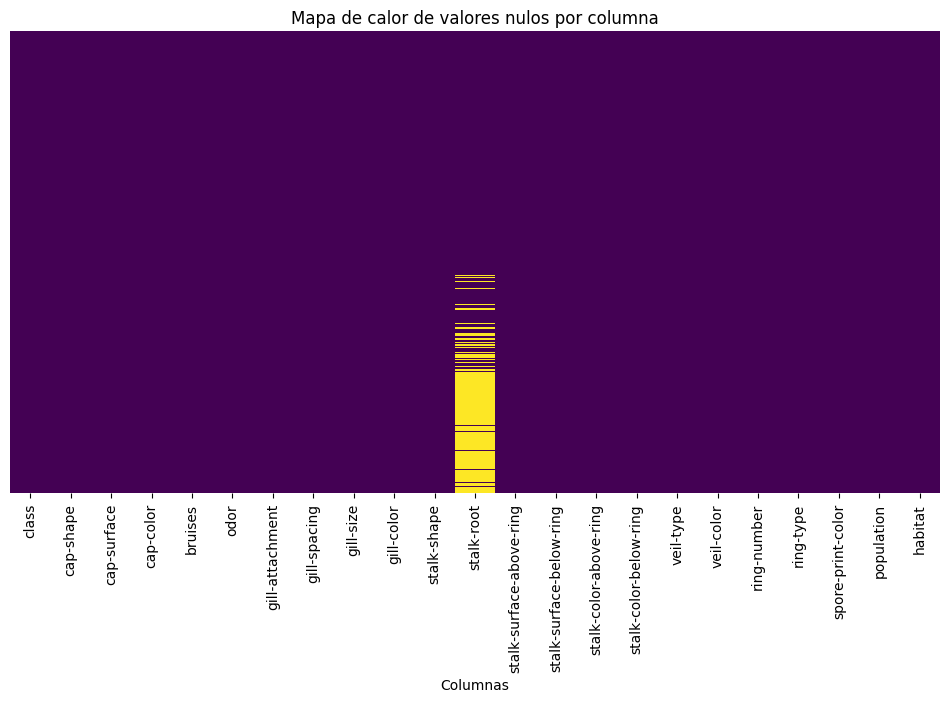

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un mapa de calor de los valores nulos
plt.figure(figsize=(12, 6))  # Ajusta el tamaño si hay muchas columnas
sns.heatmap(df_decoded.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Mapa de calor de valores nulos por columna")
plt.xlabel("Columnas")
plt.show()


Se puede observar que los valores nulos se encuentran en los últimos registros del dataset.

In [ ]:
df_decoded['flag_nan'] = df_decoded['stalk-root'].isna().astype(int)


In [ ]:
from scipy.stats import chi2_contingency

# Contar ocurrencias de cada categoría en función de si hay NaN o no
contingency_table = pd.crosstab(df_decoded['flag_nan'], df_decoded['class'])
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print(f"Chi2 statistic: {chi2_stat}, P-value: {p_val}")


Chi2 statistic: 739.6348785045413, P-value: 7.197356068384773e-163


🎯 Interpretación específica:

La presencia de valores NaN en esa variable está significativamente asociada con la variable objetivo.

Dado el valor extremadamente bajo del p-value (7.19e-163), podemos rechazar la hipótesis nula de independencia. En otras palabras:

🔍 El hecho de que un dato esté ausente influye o se relaciona con la clase o valor de la variable objetivo.

Los NaN no son aleatorios respecto al objetivo → por tanto, eliminarlos podría hacer que pierdas una señal útil para el modelo.

Esto es un caso de "Missing Not at Random" (NMAR).

In [ ]:
df_decoded['stalk-root'] = df_decoded['stalk-root'].fillna('missing')


In [ ]:
for col in df_decoded.columns:
    print(f"Columna: {col}")

    # Número de categorías (incluyendo NaN como categoría si hay)
    num_categorias = df_decoded[col].nunique(dropna=False)
    print(f"→ Número de categorías: {num_categorias}\n")

    # Tabla de frecuencias y porcentajes
    counts = df_decoded[col].value_counts(dropna=False)
    percentages = df_decoded[col].value_counts(normalize=True, dropna=False) * 100

    freq_table = pd.DataFrame({
        'Frecuencia': counts,
        'Porcentaje (%)': percentages.round(2)
    })

    print(freq_table)
    print("-" * 60)


Columna: class
→ Número de categorías: 2

           Frecuencia  Porcentaje (%)
class                                
edible           4208            51.8
poisonous        3916            48.2
------------------------------------------------------------
Columna: cap-shape
→ Número de categorías: 6

           Frecuencia  Porcentaje (%)
cap-shape                            
convex           3656           45.00
flat             3152           38.80
knobbed           828           10.19
bell              452            5.56
sunken             32            0.39
conical             4            0.05
------------------------------------------------------------
Columna: cap-surface
→ Número de categorías: 4

             Frecuencia  Porcentaje (%)
cap-surface                            
scaly              3244           39.93
smooth             2556           31.46
fibrous            2320           28.56
grooves               4            0.05
----------------------------------------------

Observamos que la variable "veil-type" tiene un solo valor por lo que no es informativa entonces la vamos a eliminar.

In [ ]:
df_decoded.drop('veil-type', axis=1, inplace=True)


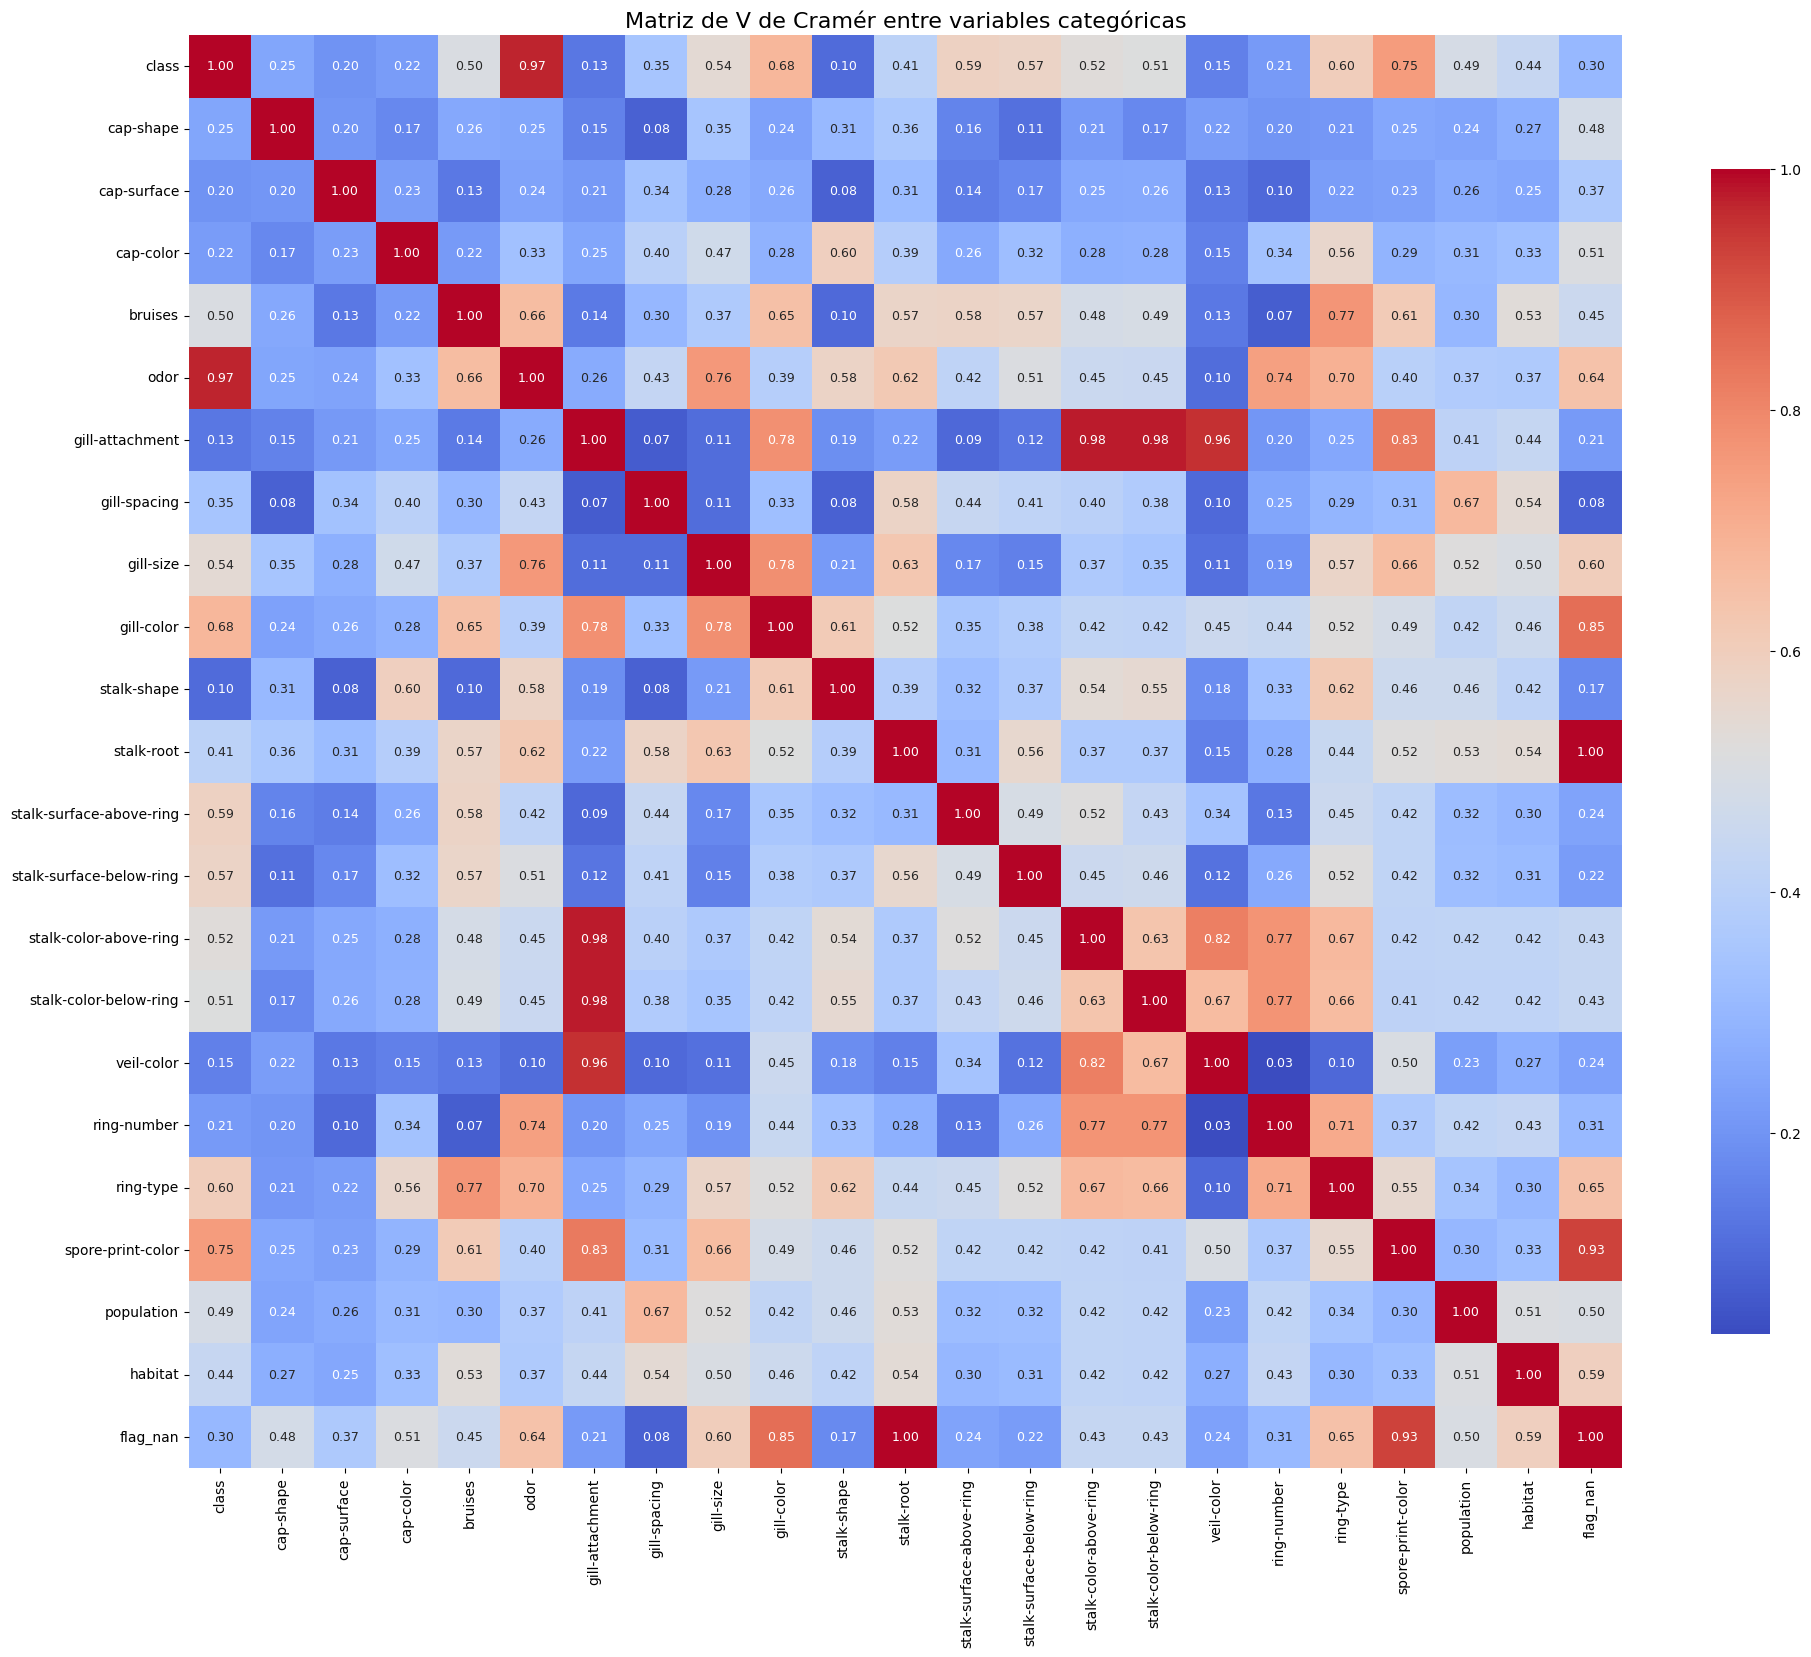

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from itertools import combinations
from scipy.stats import chi2_contingency

# Función para calcular V de Cramér
def cramers_v(confusion_matrix):
    chi2, p, dof, expected = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    k = min(confusion_matrix.shape)
    return np.sqrt(chi2 / (n * (k - 1)))

# Crear matriz vacía con nombres de columnas
matrix = pd.DataFrame(index=df_decoded.columns, columns=df_decoded.columns)

# Calcular V de Cramér para cada par de variables
for var1, var2 in combinations(df_decoded.columns, 2):
    contingency_table = pd.crosstab(df_decoded[var1], df_decoded[var2])
    value = cramers_v(contingency_table)
    matrix.loc[var1, var2] = value
    matrix.loc[var2, var1] = value

# Diagonal con 1s
np.fill_diagonal(matrix.values, 1)

# Convertir a float
matrix = matrix.astype(float)

# Visualizar heatmap con valores anotados
plt.figure(figsize=(20, 18))  # Aumenta tamaño del gráfico
sns.heatmap(matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True,
            annot_kws={"size": 9}, cbar_kws={"shrink": 0.7})
plt.title("Matriz de V de Cramér entre variables categóricas", fontsize=16)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()


Como es muy grande debido al tipo al gran numero de variables vamos a optar por mostrar solo aquellas con una correlacion de mas o igual al 80%

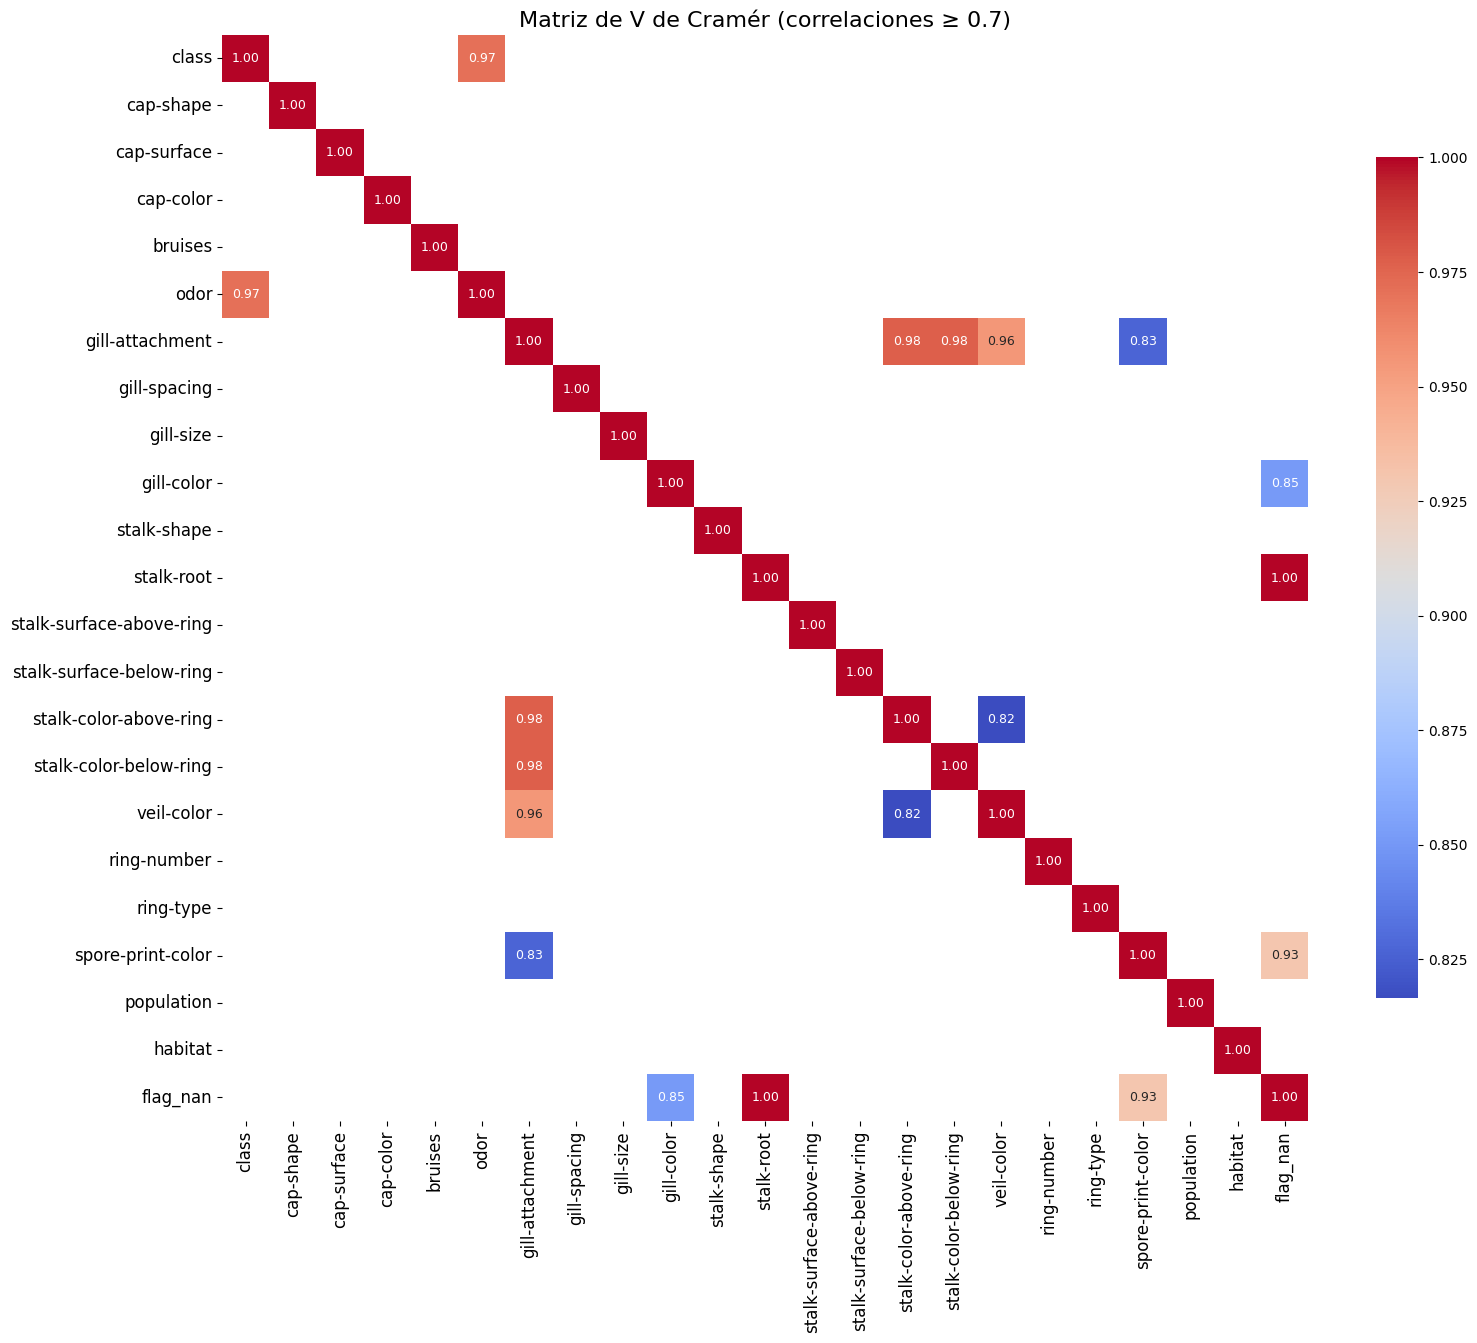

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from itertools import combinations
from scipy.stats import chi2_contingency

# Función para calcular V de Cramér
def cramers_v(confusion_matrix):
    chi2, p, dof, expected = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    k = min(confusion_matrix.shape)
    return np.sqrt(chi2 / (n * (k - 1)))

# Crear una matriz vacía para almacenar los valores de V de Cramér
matrix = pd.DataFrame(index=df_decoded.columns, columns=df_decoded.columns)

# Calcular V de Cramér para cada par de variables
for var1, var2 in combinations(df_decoded.columns, 2):
    contingency_table = pd.crosstab(df_decoded[var1], df_decoded[var2])
    value = cramers_v(contingency_table)
    matrix.loc[var1, var2] = value
    matrix.loc[var2, var1] = value

# Diagonal con 1s
np.fill_diagonal(matrix.values, 1)

# Convertir la matriz a tipo float
matrix = matrix.astype(float)

# Filtrar solo las relaciones con V de Cramér >= 0.8
high_corr_matrix = matrix[matrix >= 0.8]

# Eliminar filas y columnas completamente vacías (sin correlaciones > 0.8)
high_corr_matrix = high_corr_matrix.dropna(axis=0, how='all').dropna(axis=1, how='all')

# Visualizar el heatmap solo con las variables que tienen correlaciones altas
plt.figure(figsize=(16, 14))  # Aumenta tamaño del gráfico
sns.heatmap(high_corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True,
            annot_kws={"size": 9}, cbar_kws={"shrink": 0.7})
plt.title("Matriz de V de Cramér (correlaciones ≥ 0.7)", fontsize=16)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.show()


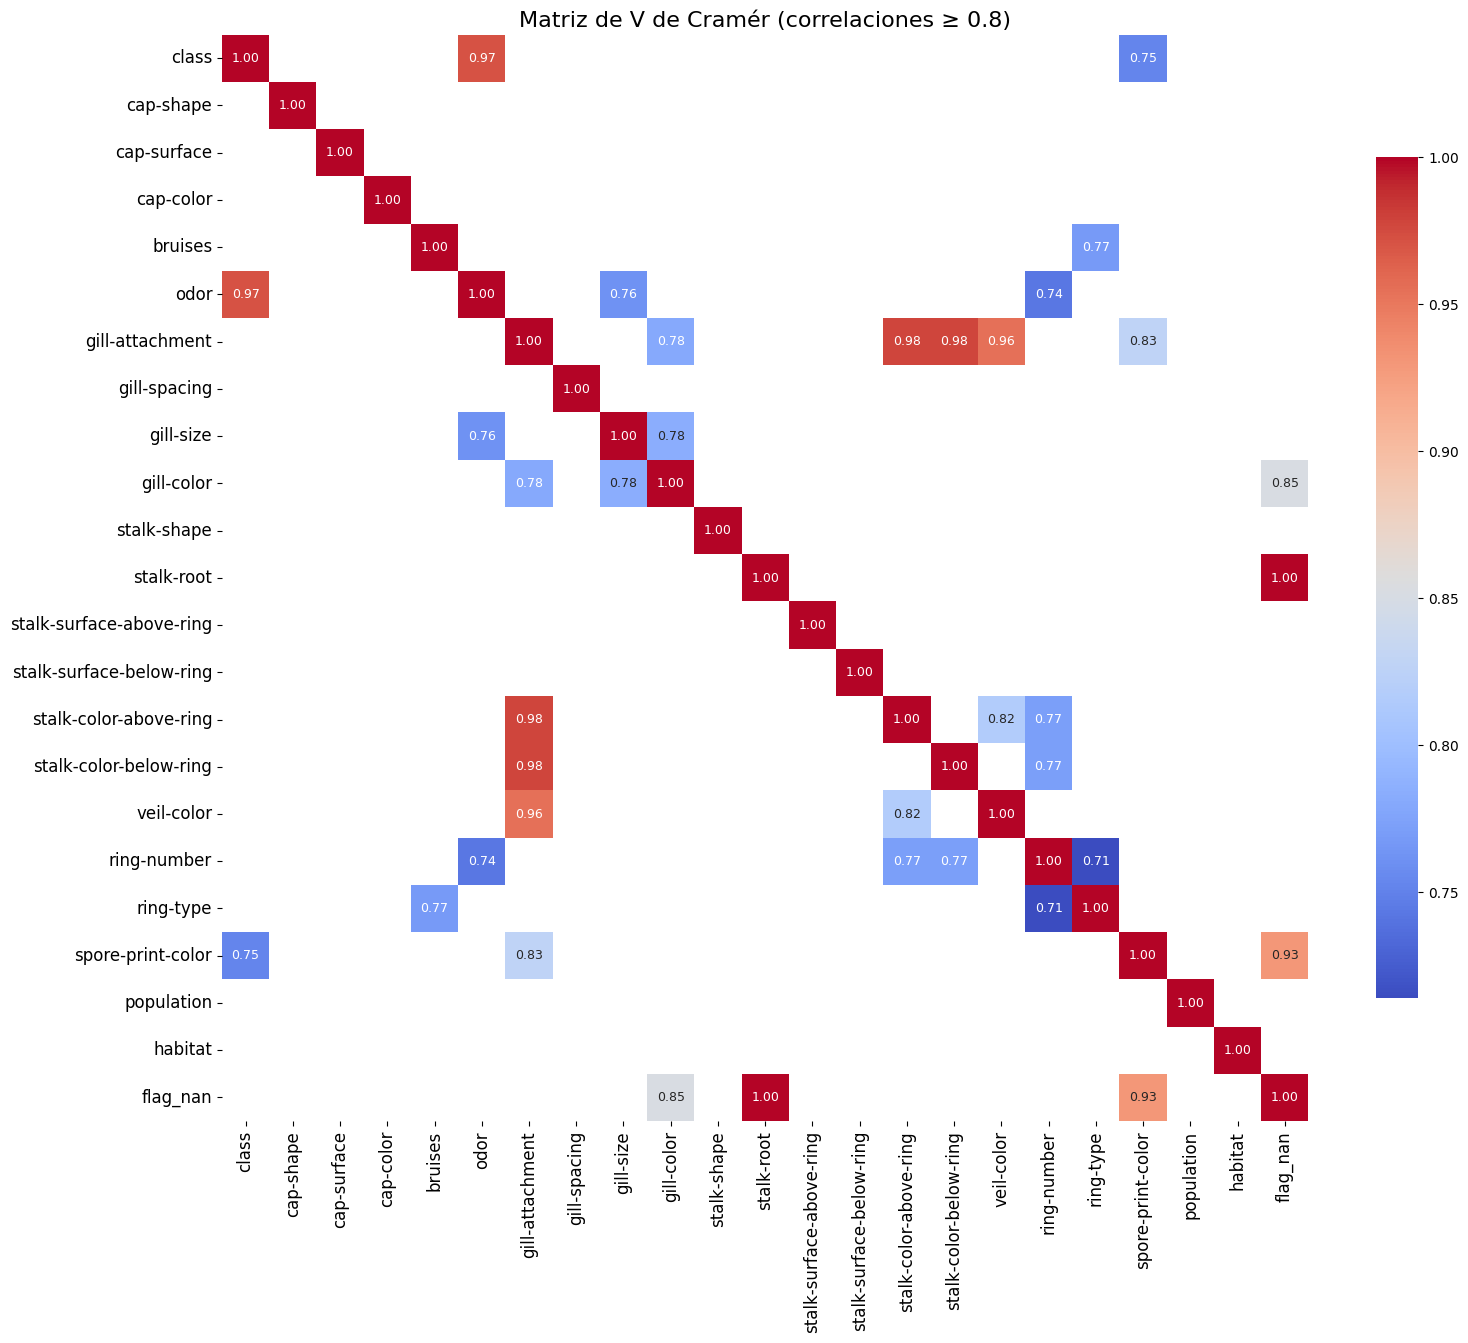

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from itertools import combinations
from scipy.stats import chi2_contingency

# Función para calcular V de Cramér
def cramers_v(confusion_matrix):
    chi2, p, dof, expected = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    k = min(confusion_matrix.shape)
    return np.sqrt(chi2 / (n * (k - 1)))

# Crear una matriz vacía para almacenar los valores de V de Cramér
matrix = pd.DataFrame(index=df_decoded.columns, columns=df_decoded.columns)

# Calcular V de Cramér para cada par de variables
for var1, var2 in combinations(df_decoded.columns, 2):
    contingency_table = pd.crosstab(df_decoded[var1], df_decoded[var2])
    value = cramers_v(contingency_table)
    matrix.loc[var1, var2] = value
    matrix.loc[var2, var1] = value

# Diagonal con 1s
np.fill_diagonal(matrix.values, 1)

# Convertir la matriz a tipo float
matrix = matrix.astype(float)

# Filtrar solo las relaciones con V de Cramér >= 0.8
high_corr_matrix = matrix[matrix >= 0.70]

# Eliminar filas y columnas completamente vacías (sin correlaciones > 0.8)
high_corr_matrix = high_corr_matrix.dropna(axis=0, how='all').dropna(axis=1, how='all')

# Visualizar el heatmap solo con las variables que tienen correlaciones altas
plt.figure(figsize=(16, 14))  # Aumenta tamaño del gráfico
sns.heatmap(high_corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True,
            annot_kws={"size": 9}, cbar_kws={"shrink": 0.7})
plt.title("Matriz de V de Cramér (correlaciones ≥ 0.8)", fontsize=16)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.show()

Correlaciones fuertes:

**stalk-root** con **flag_nan**: 1 (correlacioón perfecta)

**flag_nan** con **spore-print-color**, 0.93,

**flag_nan** con **gill-color** 0,85

**gill-attachment** con **stalk-color-above-ring** (0,98),

**gill-attachment** con **stalk-color-below-ring** (0,98),

**gill-attachment** con **veil-color** (0,96)

**gill-attachment** con**spore-print-color** (0,83)

**odor** con **class** (variable objetivo) 0,97

**veil-color** con **stalk-color-above-ring** 0,82





Comprobaremos la cardinalidad de las variables que correlacionan y su correlación con la variable objetivo y consideraremos esos criterios a la hora de decidir cual de los pares quitamos.

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Función para calcular V de Cramer
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, p, dof, expected = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1)) / (n-1))  # corrección de bias
    rcorr = r - ((r-1)**2) / (n-1)
    kcorr = k - ((k-1)**2) / (n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Lista de columnas
lista = ["stalk-root", "flag_nan", "spore-print-color", "gill-color",
         "gill-attachment", "stalk-color-above-ring",
         "stalk-color-below-ring", "veil-color"]

# Calculamos número de categorías
n_categorias = df_decoded[lista].nunique()

# Calculamos V de Cramer con la variable 'class'
v_cramers = {col: cramers_v(df_decoded[col], df_decoded['class']) for col in lista}

# Crear DataFrame resumen
summary = pd.DataFrame({
    "n_categorias": n_categorias,
    "v_cramer_con_class": pd.Series(v_cramers)
}).sort_values(by="n_categorias", ascending=False)

summary


,n_categorias,v_cramer_con_class
gill-color,12,0.679877
spore-print-color,9,0.752036
stalk-color-below-ring,9,0.513799
stalk-color-above-ring,9,0.523943
stalk-root,5,0.406224
veil-color,4,0.152222
flag_nan,2,0.301548
gill-attachment,2,0.127951


In [ ]:
df_decoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [ ]:
df_decoded.drop(columns=["cap-shape","cap-surface","cap-color","stalk-shape","ring-number","flag_nan","gill-attachment","veil-color"],inplace=True)

In [ ]:
df_decoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   bruises                   8124 non-null   object
 2   odor                      8124 non-null   object
 3   gill-spacing              8124 non-null   object
 4   gill-size                 8124 non-null   object
 5   gill-color                8124 non-null   object
 6   stalk-root                8124 non-null   object
 7   stalk-surface-above-ring  8124 non-null   object
 8   stalk-surface-below-ring  8124 non-null   object
 9   stalk-color-above-ring    8124 non-null   object
 10  stalk-color-below-ring    8124 non-null   object
 11  ring-type                 8124 non-null   object
 12  spore-print-color         8124 non-null   object
 13  population                8124 non-null   object
 14  habitat                 

In [ ]:
for col in df_decoded.columns:
    print(f"Columna: {col}")

    # Número de categorías (incluyendo NaN como categoría si hay)
    num_categorias = df_decoded[col].nunique(dropna=False)
    print(f"→ Número de categorías: {num_categorias}\n")

    # Tabla de frecuencias y porcentajes
    counts = df_decoded[col].value_counts(dropna=False)
    percentages = df_decoded[col].value_counts(normalize=True, dropna=False) * 100

    freq_table = pd.DataFrame({
        'Frecuencia': counts,
        'Porcentaje (%)': percentages.round(2)
    })

    print(freq_table)
    print("-" * 60)


Columna: class
→ Número de categorías: 2

           Frecuencia  Porcentaje (%)
class                                
edible           4208            51.8
poisonous        3916            48.2
------------------------------------------------------------
Columna: bruises
→ Número de categorías: 2

         Frecuencia  Porcentaje (%)
bruises                            
no             4748           58.44
bruises        3376           41.56
------------------------------------------------------------
Columna: odor
→ Número de categorías: 9

          Frecuencia  Porcentaje (%)
odor                                
none            3528           43.43
foul            2160           26.59
spicy            576            7.09
fishy            576            7.09
almond           400            4.92
anise            400            4.92
pungent          256            3.15
creosote         192            2.36
musty             36            0.44
------------------------------------------------

## Antes de agrupar las categorías revisadas y pre-seleccionadas para confirmar la  determinación de las mismas en cuanto a si es venenoso o comestible.

In [ ]:
import pandas as pd

cols_to_check = [
    'stalk-color-above-ring',
    'stalk-color-below-ring',
    'spore-print-color'
]

for col in cols_to_check:
    print(f"=== {col} vs class ===")
    print(pd.crosstab(df_decoded[col], df_decoded['class'], normalize='index') * 100)
    print("-" * 40)

=== stalk-color-above-ring vs class ===
class                       edible   poisonous
stalk-color-above-ring                        
brown                     3.571429   96.428571
buff                      0.000000  100.000000
cinnamon                  0.000000  100.000000
gray                    100.000000    0.000000
orange                  100.000000    0.000000
pink                     30.769231   69.230769
red                     100.000000    0.000000
white                    61.648746   38.351254
yellow                    0.000000  100.000000
----------------------------------------
=== stalk-color-below-ring vs class ===
class                       edible   poisonous
stalk-color-below-ring                        
brown                    12.500000   87.500000
buff                      0.000000  100.000000
cinnamon                  0.000000  100.000000
gray                    100.000000    0.000000
orange                  100.000000    0.000000
pink                     30.76923

### Se visualiza en una gráfica la importancia de las categorias de nuestras variables preseleccionadas

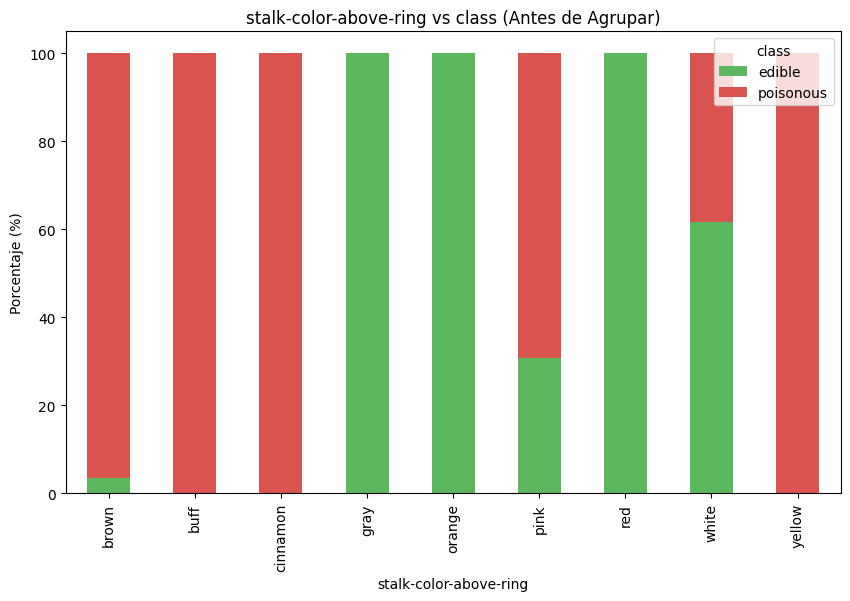

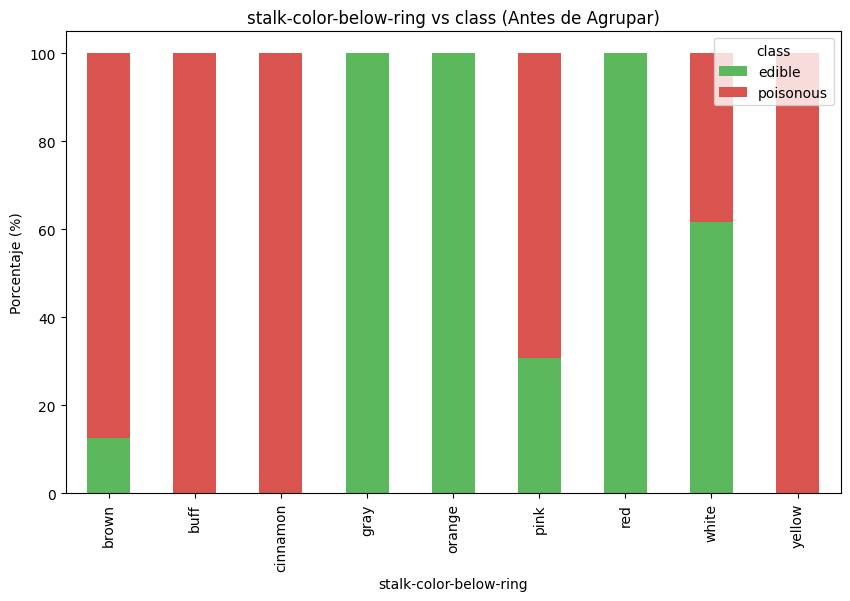

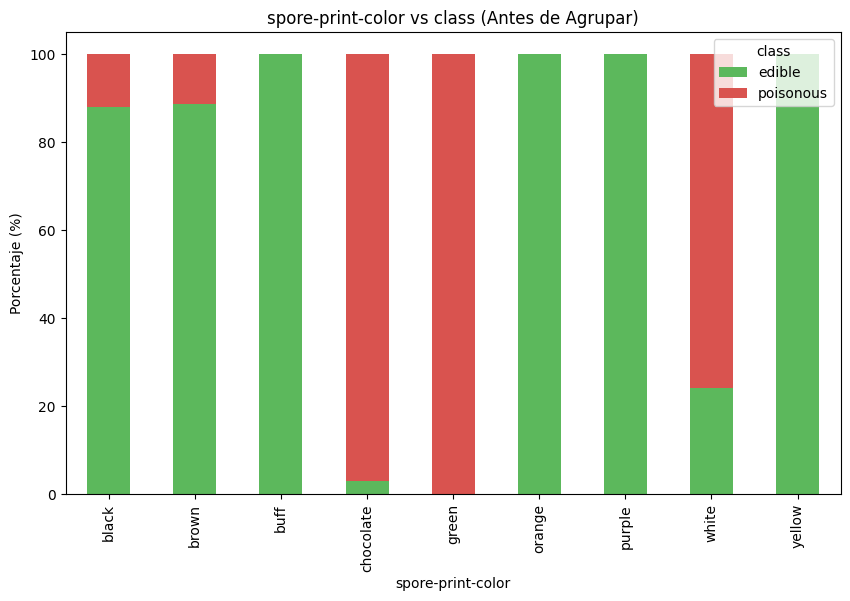

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_crosstab(col):
    crosstab = pd.crosstab(df_decoded[col], df_decoded['class'], normalize='index') * 100
    crosstab.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#5cb85c', '#d9534f'])
    plt.title(f'{col} vs class (Antes de Agrupar)')
    plt.ylabel('Porcentaje (%)')
    plt.xlabel(col)
    plt.legend(title='class', loc='upper right')
    plt.show()

# Graficamos las tres columnas originales
for col in ['stalk-color-above-ring', 'stalk-color-below-ring', 'spore-print-color']:
    plot_crosstab(col)

## Agrupamos las categorias con menor frecuencia en el dataset dependiendo del peso de las mismas para evitar un mal entrenamiento del modelo.

### Visualización de las tablas con las columnas agrupadas.


✅ Nuevas categorías en 'stalk-color-above-ring':
stalk-color-above-ring
white              4464
pink               1872
gray                576
brown               448
buff                432
Red-Orange          288
Cinnamon-Yellow      44
Name: count, dtype: int64

✅ Nuevas categorías en 'stalk-color-below-ring':
stalk-color-below-ring
white              4384
pink               1872
gray                576
brown               512
buff                432
Red-Orange          288
Cinnamon-Yellow      60
Name: count, dtype: int64

✅ Nuevas categorías en 'spore-print-color':
spore-print-color
white        2388
brown        1968
black        1872
chocolate    1632
Otros         192
green          72
Name: count, dtype: int64


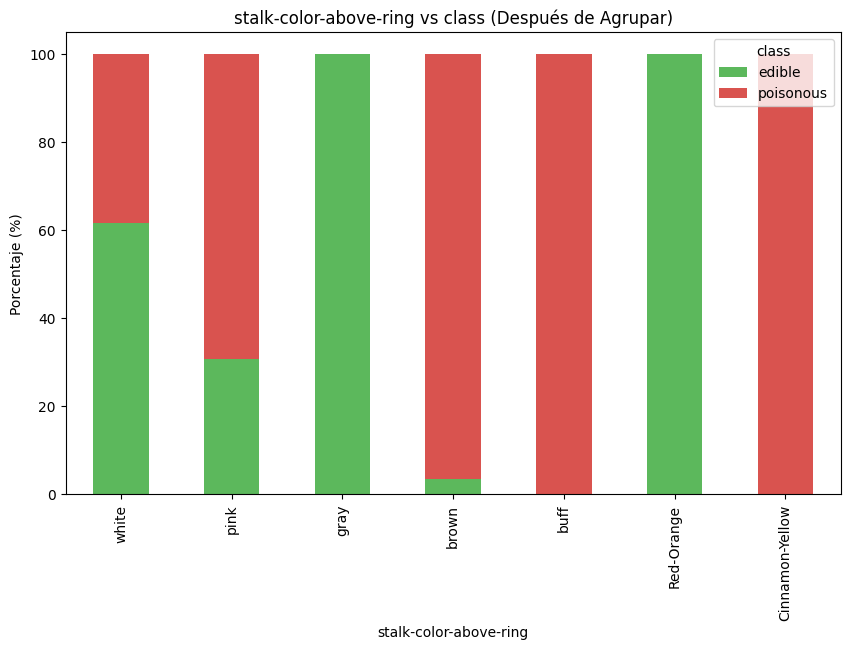

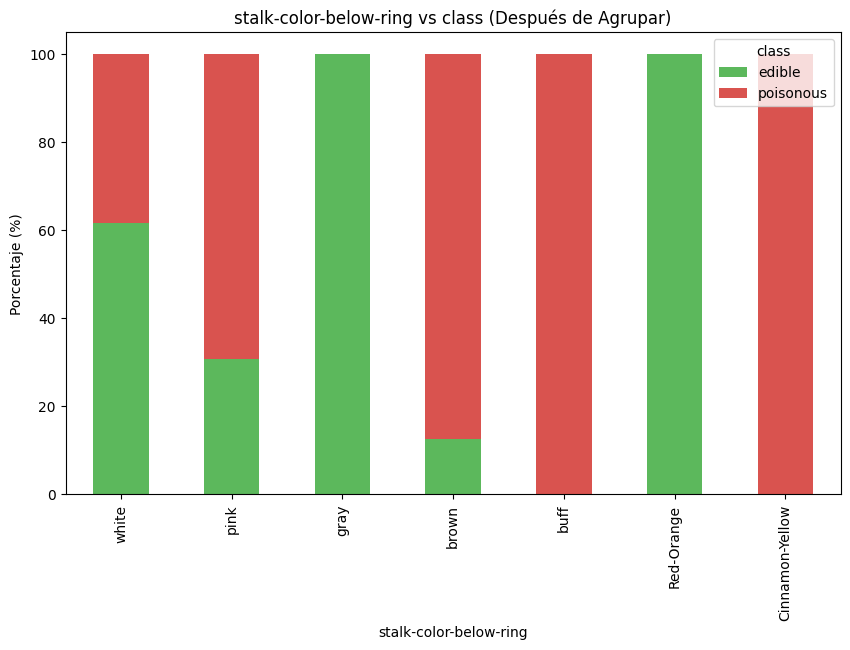

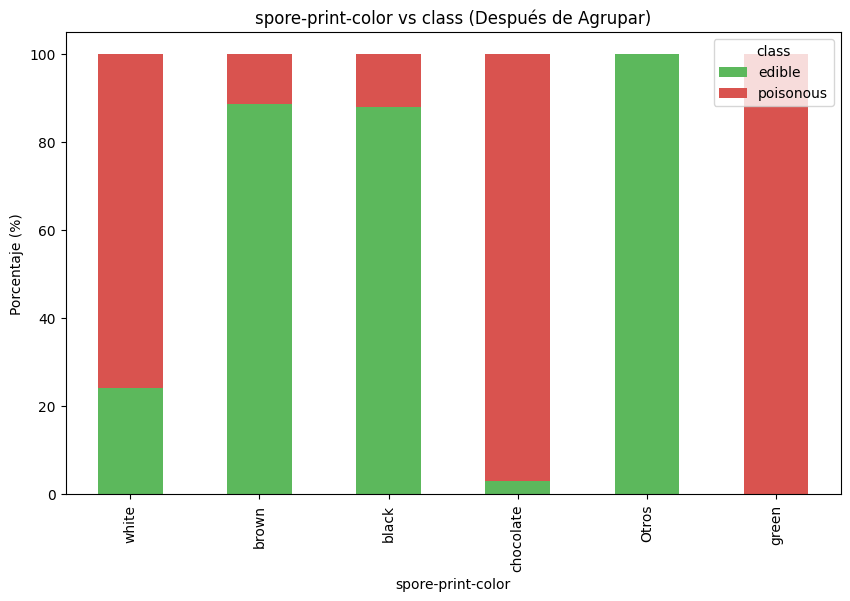


💾 Dataset exportado como 'mushrooms_cleaned.csv'. ¡Todo listo para entrenar el modelo! ✅


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 🔄 Agrupación de stalk-color-above-ring y stalk-color-below-ring
def agrupar_colores(x):
    if x in ['red', 'orange']:
        return 'Red-Orange'
    elif x in ['cinnamon', 'yellow']:
        return 'Cinnamon-Yellow'
    else:
        return x

for col in ['stalk-color-above-ring', 'stalk-color-below-ring']:
    df_decoded[col] = df_decoded[col].apply(agrupar_colores)
    print(f"\n✅ Nuevas categorías en '{col}':")
    print(df_decoded[col].value_counts())

# 🔄 Agrupación de spore-print-color
otros_esporas = ['buff', 'orange', 'purple', 'yellow']

df_decoded['spore-print-color'] = df_decoded['spore-print-color'].apply(
    lambda x: 'Otros' if x in otros_esporas else x
)

print("\n✅ Nuevas categorías en 'spore-print-color':")
print(df_decoded['spore-print-color'].value_counts())

# 📊 Función para graficar las crosstabs ordenadas
def plot_crosstab_sorted(col):
    crosstab = pd.crosstab(df_decoded[col], df_decoded['class'], normalize='index') * 100
    order = df_decoded[col].value_counts().index  # Orden por frecuencia
    crosstab.loc[order].plot(kind='bar', stacked=True, figsize=(10, 6), color=['#5cb85c', '#d9534f'])
    plt.title(f'{col} vs class (Después de Agrupar)')
    plt.ylabel('Porcentaje (%)')
    plt.xlabel(col)
    plt.legend(title='class', loc='upper right')
    plt.show()

# 🚀 Graficamos cada columna
for col in ['stalk-color-above-ring', 'stalk-color-below-ring', 'spore-print-color']:
    plot_crosstab_sorted(col)

# 💾 Exportamos el dataset limpio a CSV
df_decoded.to_csv('mushrooms_cleaned.csv', index=False)
print("\n💾 Dataset exportado como 'mushrooms_cleaned.csv'. ¡Todo listo para entrenar el modelo! ✅")

Cargar el dataset "limpio"

In [ ]:
data=pd.read_csv("/content/agaricus-lepiota-decoded.csv")
pd.set_option('display.max_columns', None)
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,enlarging,equal,smooth,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,enlarging,club,smooth,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,enlarging,club,smooth,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,enlarging,equal,smooth,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,tapering,equal,smooth,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,edible,knobbed,smooth,brown,no,none,attached,close,broad,yellow,enlarging,missing,smooth,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves
8120,edible,convex,smooth,brown,no,none,attached,close,broad,yellow,enlarging,missing,smooth,smooth,orange,orange,partial,brown,one,pendant,buff,several,leaves
8121,edible,flat,smooth,brown,no,none,attached,close,broad,brown,enlarging,missing,smooth,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves
8122,poisonous,knobbed,scaly,brown,no,fishy,free,close,narrow,buff,tapering,missing,smooth,silky,white,white,partial,white,one,evanescent,white,several,leaves



Separar entre variables predictoras y variables a predeci

In [ ]:
# 2. Preparación de los datos
# Separar características (X) y variable objetivo (y)
X = data.drop('class', axis=1)
y = data['class']

# Convertir variable objetivo a valores numéricos para facilitar la evaluación
y = y.map({'edible': 0, 'poisonous': 1})

Codificar correctamente las variables categóricas a numéricas

In [ ]:
# 3. Codificación de variables categóricas usando One-Hot Encoding
# Todas las columnas son categóricas, así que las transformamos todas
categorical_features = X.columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
    ])



Train test split

In [ ]:
# Os lo dejamos a todos igual
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
# ⚙️ Aplica One-Hot Encoding primero
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

# ✅ Ahora sí puedes escalar los datos codificados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

PCA

Es un conjunto de datos del que aún no hemos visto nada (no tenemos graficas) así que vamos a hacer algunas. Tenemos el problema de que son muchas variables, PCA al rescate: le pedimos que nos de dos dimensiones y las pintamos, sabemos que serán aquellas que retengan más información

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [ ]:
# 2️⃣ Aplicar PCA
pca = PCA(n_components=0.95)  # Mantener el 95% de la varianza (puedes elegir un número fijo de componentes)
X_train_pca = pca.fit_transform(X_train_encoded)
X_test_pca = pca.transform(X_test_encoded)

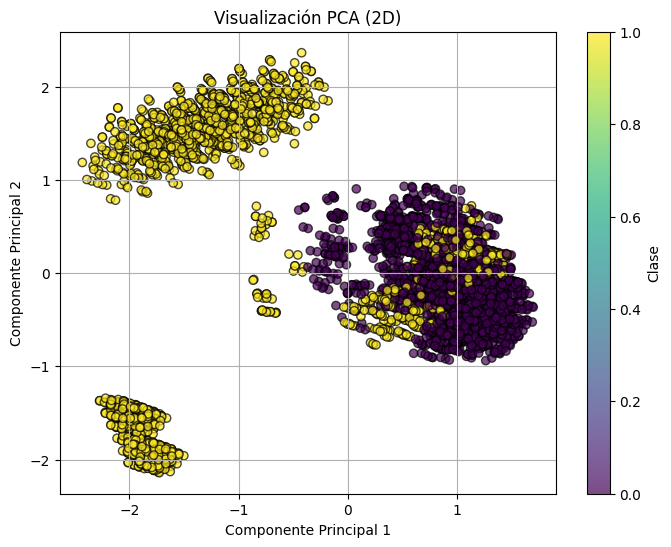

In [ ]:
# Visualización PCA 2D
pca_2d = PCA(n_components=2)
X_train_pca_2d = pca_2d.fit_transform(X_train_encoded)

plt.figure(figsize=(8,6))
plt.scatter(X_train_pca_2d[:, 0], X_train_pca_2d[:, 1], c=y_train, cmap='viridis', edgecolor='k', alpha=0.7)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Visualización PCA (2D)')
plt.colorbar(label='Clase')
plt.grid(True)
plt.show()


Parece que está bastante separadito, parece que a ojo mucho se puede ver :)

Igualmente, vamos a entrenar un clasificador a ver qué tal lo hace antes de editar más

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Crear el modelo
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# 2. Entrenar el modelo con los datos de entrenamiento PCA
rf.fit(X_train_pca, y_train)

# 3. Predecir con los datos de prueba PCA
y_pred = rf.predict(X_test_pca)

# 4. Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))



Accuracy: 1.0000

Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1378
           1       1.00      1.00      1.00      1303

    accuracy                           1.00      2681
   macro avg       1.00      1.00      1.00      2681
weighted avg       1.00      1.00      1.00      2681


Matriz de confusión:
[[1378    0]
 [   0 1303]]


Es un conjunto sencillo y Random Forest es muy bueno en su trabajo, Igualmente,

1.   List item
2.   List item

vamos a ver qué tamaño tenemos de dataset:

In [ ]:
# Predecir sobre test
y_pred = rf.predict(X_test_pca)

# Calcular precisión
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión sobre test: {accuracy:.4f}")

Precisión sobre test: 1.0000


In [ ]:
X_train_pca.shape

(5443, 37)

¿Muchas features no? Vamos a reducir las usando PCA.

Componentes: 1 - Precisión: 0.8266
Componentes: 2 - Precisión: 0.9258
Componentes: 3 - Precisión: 0.9608
Componentes: 4 - Precisión: 0.9847
Componentes: 5 - Precisión: 0.9937
Componentes: 6 - Precisión: 0.9966
Componentes: 7 - Precisión: 0.9974
Componentes: 8 - Precisión: 0.9978
Componentes: 9 - Precisión: 0.9978
Componentes: 10 - Precisión: 0.9989
Componentes: 11 - Precisión: 0.9993
Componentes: 12 - Precisión: 0.9996
Componentes: 13 - Precisión: 0.9993
Componentes: 14 - Precisión: 0.9993
Componentes: 15 - Precisión: 0.9993
Componentes: 16 - Precisión: 0.9996
Componentes: 17 - Precisión: 0.9996
Componentes: 18 - Precisión: 0.9996
Componentes: 19 - Precisión: 0.9996
Componentes: 20 - Precisión: 0.9996
Componentes: 21 - Precisión: 0.9996
Componentes: 22 - Precisión: 0.9996
Componentes: 23 - Precisión: 0.9993
Componentes: 24 - Precisión: 0.9996
Componentes: 25 - Precisión: 0.9993
Componentes: 26 - Precisión: 0.9993
Componentes: 27 - Precisión: 0.9993
Componentes: 28 - Precisión: 0.9996
C

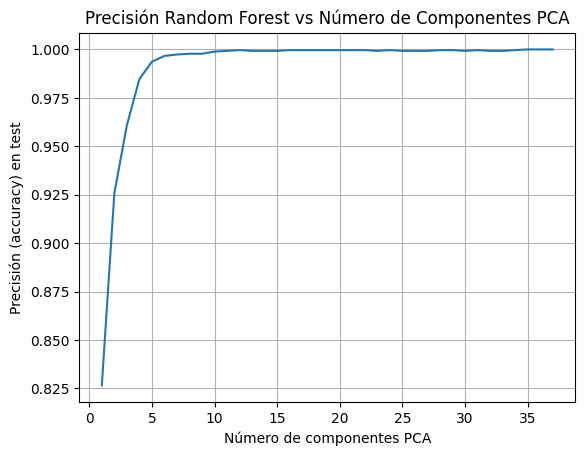

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Asumo que ya tienes X_train_encoded, X_test_encoded (One-Hot + escalado)
# y y_train, y_test

n_features = list(range(1, 38))  # De 1 a 37 componentes
scores = []

for n in n_features:
    # Definir PCA con n componentes
    pca = PCA(n_components=n)

    # Aprender PCA y transformar datos
    X_train_pca = pca.fit_transform(X_train_encoded)
    X_test_pca = pca.transform(X_test_encoded)

    # Definir Random Forest
    rf = RandomForestClassifier(n_estimators=100, random_state=42)

    # Entrenar el Random Forest
    rf.fit(X_train_pca, y_train)

    # Predecir y calcular precisión
    y_pred = rf.predict(X_test_pca)
    acc = accuracy_score(y_test, y_pred)
    scores.append(acc)
    print(f"Componentes: {n} - Precisión: {acc:.4f}")

# Graficar
sns.lineplot(x=n_features, y=scores)
plt.xlabel('Número de componentes PCA')
plt.ylabel('Precisión (accuracy) en test')
plt.title('Precisión Random Forest vs Número de Componentes PCA')
plt.grid(True)
plt.show()


Vale, estamos viendo que a partir de unas 10 features ya tenemos el score que queríamos y además hemos reducido las variables a un 10% de las que teníamos, incluso menos que las variables originales.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

# Definir PCA con 10 componentes
pca_10 = PCA(n_components=10)
X_train_pca_10 = pca_10.fit_transform(X_train_encoded)
X_test_pca_10 = pca_10.transform(X_test_encoded)

# Entrenar Random Forest con datos transformados
rf_10 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_10.fit(X_train_pca_10, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
import pandas as pd

# Supongamos que tus variables originales son estas
variables = X_train_encoded.columns if hasattr(X_train_encoded, 'columns') else [f'var{i}' for i in range(X_train_encoded.shape[1])]

# Obtener matriz de componentes
components = pca_10.components_

# Convertir a DataFrame para mejor visualización
df_components = pd.DataFrame(components, columns=variables)

print(df_components)


       var0      var1      var2      var3      var4      var5      var6  \
0  0.000209  0.032372 -0.012642 -0.054351  0.002440  0.000264 -0.055520   
1  0.000201 -0.071176 -0.055629  0.127185  0.000307  0.000214 -0.028032   
2 -0.000437 -0.031177  0.101225 -0.010234 -0.002973 -0.000365  0.200903   
3 -0.000348 -0.341461  0.440250 -0.024042  0.002115 -0.000218 -0.250288   
4 -0.001136  0.542323 -0.347567 -0.103308  0.001506 -0.000716 -0.150767   
5 -0.000570 -0.316861  0.404119 -0.091588  0.002329 -0.000338  0.155226   
6  0.000854  0.051393 -0.040205  0.023816 -0.000675  0.000165  0.535957   
7 -0.000728  0.013359  0.016867  0.001678 -0.001214  0.000307 -0.120749   
8  0.001190  0.004241 -0.008177 -0.007838  0.012470  0.000322  0.237084   
9 -0.000241 -0.019749  0.006690  0.015218 -0.005334  0.000016 -0.108239   

       var7      var8      var9     var10     var11     var12     var13  \
0  0.023077  0.007815 -0.000318 -0.008374 -0.000049  0.009158 -0.000036   
1  0.176839 -0.000257  0

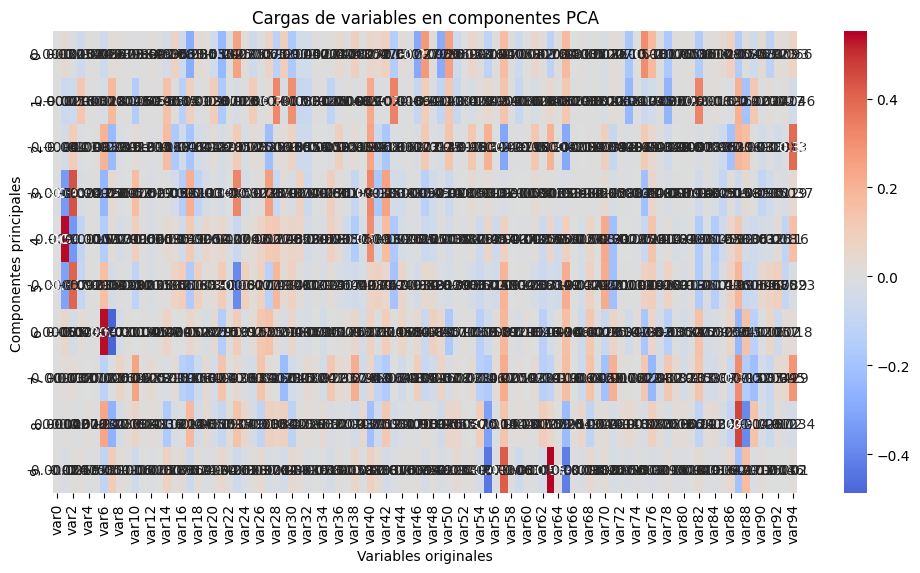

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(df_components, cmap='coolwarm', center=0, annot=True)
plt.xlabel('Variables originales')
plt.ylabel('Componentes principales')
plt.title('Cargas de variables en componentes PCA')
plt.show()


Clustering

Viendo que el conjunto de datos es sencillito, podemos intentar hacer algo de clustering a ver qué información podemos obtener.

El primer paso va a ser importar la función de Kmeans de sklearn, y a partir de ahi, vamos a buscar el valor óptimo de clusters. Como hemos visto anteriormente, este valor lo obtenemos, por ejemplo, del codo de la gráfica que representa el total de las distancias de los puntos a los centros de los clusters asociados. Os dejo la página de la documentación de sklearn para que lo busquéis:

[K-Means on sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)


Con esto solo hay que ahora generar los modelos de kmeans, evaluar y pintar la gráfica para los valores de k que establezcais.

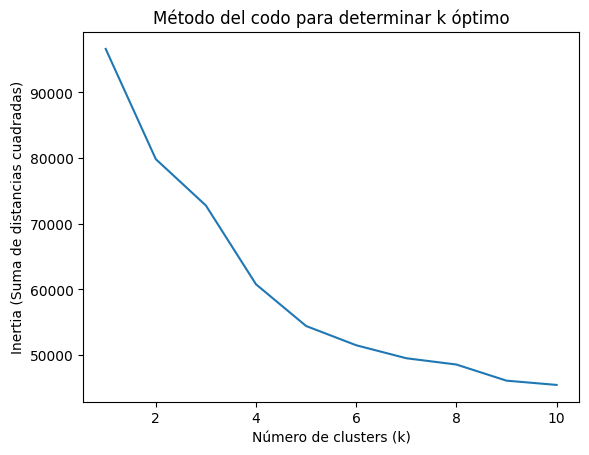

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que tu dataset original es 'data'
data_encoded = pd.get_dummies(data)  # convierte categorías en variables binarias

scores = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_encoded)
    scores.append(kmeans.inertia_)

sns.lineplot(x=k_values, y=scores)
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inertia (Suma de distancias cuadradas)')
plt.title('Método del codo para determinar k óptimo')
plt.show()



Como la grafica de codo no me es del todo explicativa voy a graficar tambíen la silhoutte score

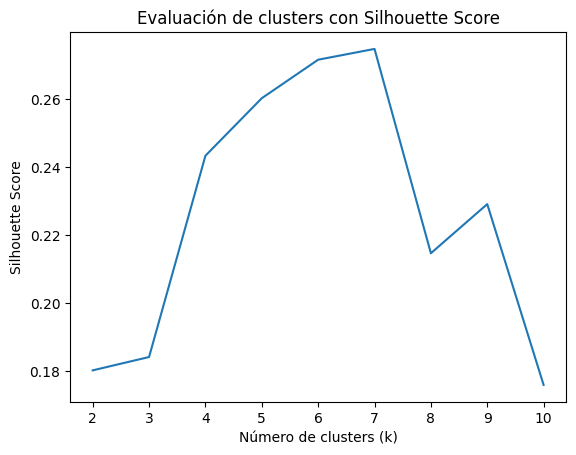

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

silhouette_scores = []
k_values = range(2, 11)  # empezamos en 2 porque silhouette no se calcula con 1 cluster

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_encoded)  # recuerda usar tus datos numéricos o codificados
    labels = kmeans.labels_
    score = silhouette_score(data_encoded, labels)
    silhouette_scores.append(score)

sns.lineplot(x=k_values, y=silhouette_scores)
plt.xlabel('Número de clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Evaluación de clusters con Silhouette Score')
plt.show()

Con el valor que hayáis obtenido de la gráfica, podéis obtener una buena aproximación de Kmeans y con ello podemos pasar a explorar cómo de bien han separado la información los distintos clusters. Para ello, se va a hacer un catplot, seaborn os lo hará solito. Con esto lo que se pretende ver es la distribución de la varaible a predecir en función del cluster que haya determinado Kmeans.

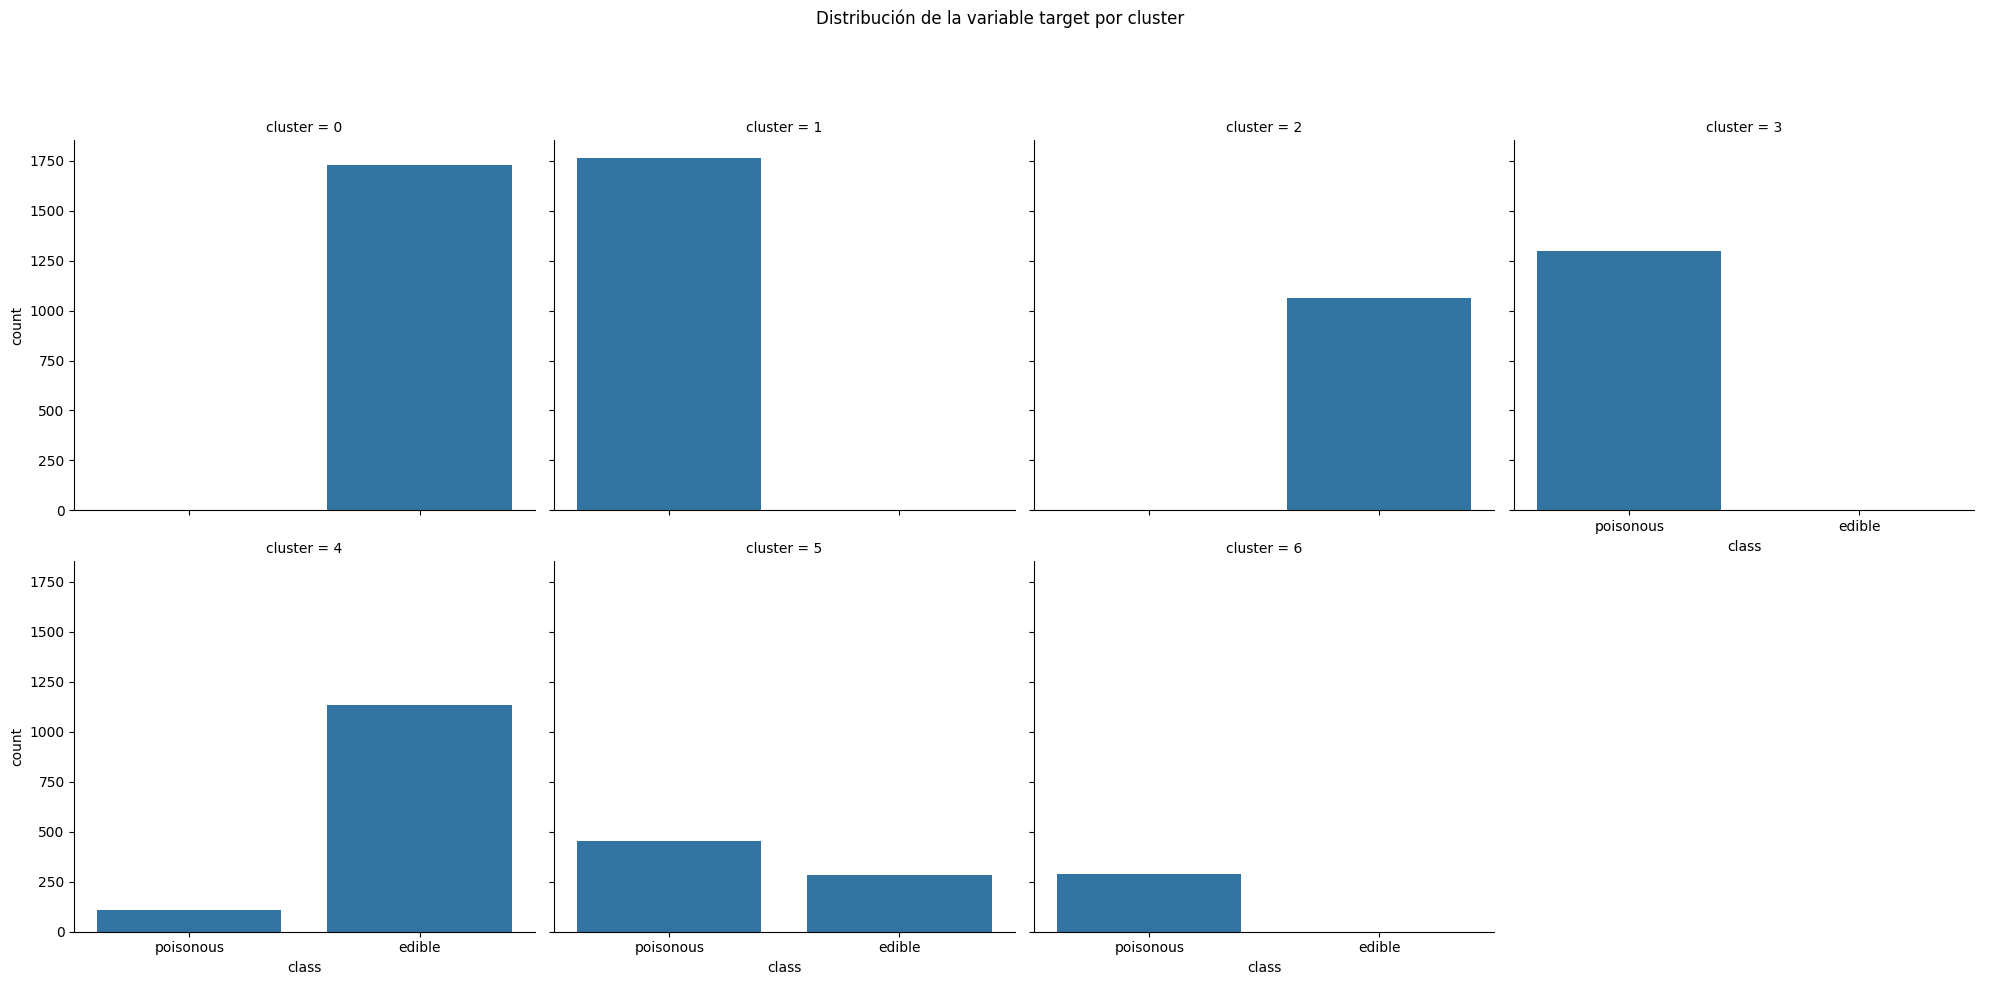

In [ ]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Entrenar KMeans con k=7
k_opt = 7
kmeans = KMeans(n_clusters=k_opt, random_state=42)
kmeans.fit(data_encoded)

# Añadir los labels de clusters al dataframe original
data['cluster'] = kmeans.labels_

# Crear un catplot para analizar la distribución de la variable 'target' por cluster
ax = sns.catplot(
    col='cluster',        # un gráfico por cada cluster
    x='class',           # cambia 'target' por el nombre de tu variable categórica
    data=data,            # dataset original con columna 'cluster'
    kind='count',         # conteo de valores por categoría
    col_wrap=4            # máximo 4 gráficos por fila
)

ax.fig.suptitle('Distribución de la variable target por cluster')
ax.fig.subplots_adjust(top=0.85)  # ajuste para el título

plt.show()


Vamos a ver qué tal queda esto pintado. Para ello, repetimos el scatterplot de antes pero usando como color el cluster asignado por kmeans.

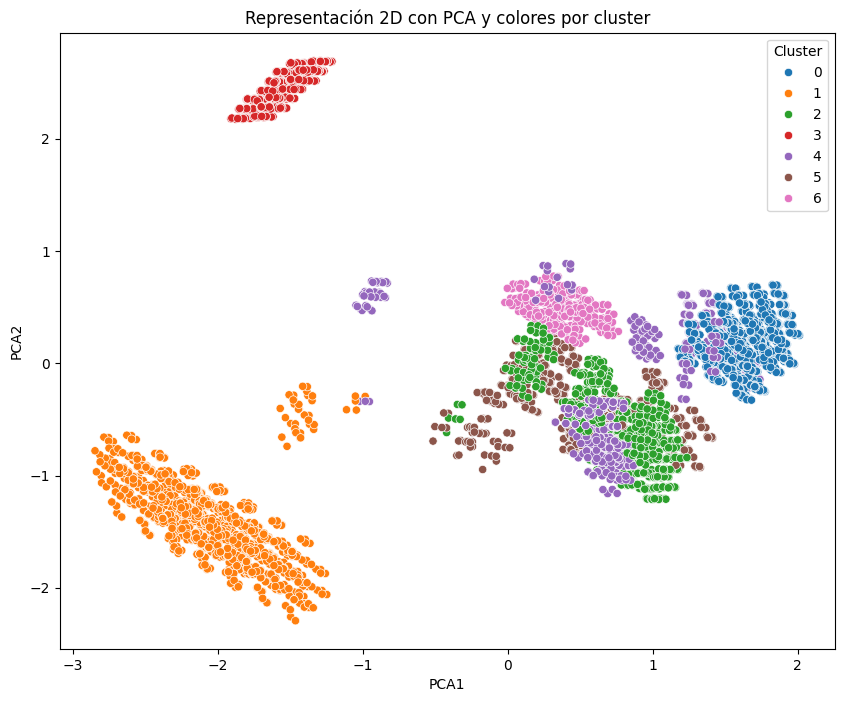

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Entrenar PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_encoded)

# Añadir las dos primeras componentes principales al dataframe
data['PCA1'] = pca_result[:, 0]
data['PCA2'] = pca_result[:, 1]

# Pintar scatterplot, coloreando por cluster
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PCA1',
    y='PCA2',
    hue='cluster',  # usa la columna de clusters asignados por KMeans
    palette='tab10',  # o cualquier paleta que prefieras
    data=data,
    legend='full'
)
plt.title('Representación 2D con PCA y colores por cluster')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.show()


¿Es bastante parecido no? No es tan bueno como el Random Forest, pero ha conseguido identificar bastante bien los distintos puntos del dataset sin utilizar las etiquetas. De hecho, el diagrama de factor que hemos visto antes muestra que solo un par de clusters son imprecisos. Si no hubieramos tenido etiquetas esta aproximacion nos hubiera ayudado mucho a clasificar los distintos tipos de hongos.